In [48]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

from src.data import DataLoader
from src.data.preprocess import extend_market_data

In [49]:
SRW = yf.Ticker("ZW=F")
SRW_data = SRW.history(start ="2014-01-01").drop(['Dividends', 'Stock Splits'], axis=1)
market_data = extend_market_data(SRW_data)

In [50]:
market_data

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,expiry,...,High-Close,Low-Close,TR,14D_ATR,Volume_Volatility_Ratio,14D_RSI,7D_MA,14D_MA,7D_EMA,14D_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,605.00,605.25,595.50,597.00,39720,2014,1,2,2,2014-03-14,...,NaN,NaN,9.75,NaN,NaN,NaN,NaN,NaN,597.000000,597.000000
2014-01-03,596.75,609.00,596.00,605.75,49188,2014,1,3,3,2014-03-14,...,12.00,1.00,13.00,NaN,NaN,NaN,NaN,NaN,599.187500,598.166667
2014-01-06,608.00,612.75,605.00,605.75,39432,2014,1,6,6,2014-03-14,...,7.00,0.75,7.75,NaN,NaN,NaN,NaN,NaN,600.828125,599.177778
2014-01-07,606.50,610.00,601.75,602.50,45799,2014,1,7,7,2014-03-14,...,4.25,4.00,8.25,NaN,NaN,NaN,NaN,NaN,601.246094,599.620741
2014-01-08,603.00,607.25,586.75,588.75,55310,2014,1,8,8,2014-03-14,...,4.75,15.75,20.50,NaN,NaN,NaN,NaN,NaN,598.122070,598.171309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21,557.75,563.00,553.25,558.25,47008,2025,3,21,80,2025-05-14,...,5.75,4.00,9.75,11.321429,2.734953e+06,63.358779,557.928571,546.464286,556.678753,554.384586
2025-03-24,561.25,563.00,545.25,548.25,53647,2025,3,24,83,2025-05-14,...,4.75,13.00,17.75,11.410714,3.293163e+06,65.699208,558.071429,548.589286,554.571565,553.566641
2025-03-25,548.00,549.50,541.00,543.25,57054,2025,3,25,84,2025-05-14,...,1.25,7.25,8.50,10.875000,3.652391e+06,57.142857,557.714286,549.482143,551.741173,552.191089


In [51]:
dl = DataLoader()
production_raw = dl.get_production_data("WHEAT", 2014, True, raw=True)

In [52]:
production_national = production_raw[
    (production_raw.unit_desc == 'BU') &
    (production_raw.short_desc == 'WHEAT - PRODUCTION, MEASURED IN BU') &
    (production_raw.domain_desc == 'TOTAL')
][['state_name', 'Value', 'unit_desc', 'year', 'source_desc', 'short_desc']]

production_national['year'] = pd.to_numeric(production_national['year'])
production_national['Value'] = production_national['Value'].str.replace(',', '', regex=True)
production_national['Value'] = pd.to_numeric(production_national['Value'], errors='coerce')

production_national = production_national.groupby(by ='year').agg({'Value': 'mean'})
production_national.rename(columns={'Value': 'Production'}, inplace = True)
production_national

,Production
year,
2014,2.015884e+09
2015,2.115288e+09
2016,2.296725e+09
2017,1.757082e+09
2018,1.881198e+09
2019,1.944408e+09
2020,1.826966e+09
2021,1.696360e+09
2022,1.730126e+09


In [53]:
production_state_raw = dl.get_production_data("WHEAT", 2014, raw=True)
production_state = production_state_raw[
    (production_state_raw.unit_desc == 'BU') &
    (production_state_raw.class_desc == 'WINTER') &
#    ((production_state_raw.class_desc == 'WINTER') | (production_state_raw.class_desc == 'ALL CLASSES')) &
    (production_state_raw.domaincat_desc == 'NOT SPECIFIED') &
    (production_state_raw.short_desc == 'WHEAT, WINTER - PRODUCTION, MEASURED IN BU')
][['state_name', 'Value', 'unit_desc', 'year', 'source_desc', 'class_desc', 'reference_period_desc', 'short_desc']]

production_state['year'] = pd.to_numeric(production_state['year'])
production_state['Value'] = production_state['Value'].str.replace(',', '', regex=True)
production_state['Value'] = pd.to_numeric(production_state['Value'], errors='coerce')
# production_state

([<matplotlib.patches.Wedge at 0x109b5a810>,
 [Text(0.8612070158237694, 0.6843409061980134, 'KANSAS'),
  Text(-0.11121373944850914, 1.0943635155458535, 'WASHINGTON'),
  Text(-0.6261903332722272, 0.9043703149243772, 'OKLAHOMA'),
  Text(-0.8958764671756616, 0.6382831311893303, 'IDAHO'),
  Text(-1.0575735213610251, 0.30255288284206017, 'MONTANA'),
  Text(-1.0997929837197296, -0.021339938164265857, 'ILLINOIS'),
  Text(-1.0588135292680791, -0.29818435612700184, 'OTHER STATES'),
  Text(-0.9542127505175882, -0.5472458558542578, 'OREGON'),
  Text(-0.8045158042915961, -0.7501695279368834, 'COLORADO'),
  Text(-0.6259730290591881, -0.9045207387840618, 'TEXAS'),
  Text(-0.43205468511577466, -1.0115971278475977, 'MISSOURI'),
  Text(-0.23080313550901935, -1.0755137900739373, 'SOUTH DAKOTA'),
  Text(-0.024950878384638307, -1.099716987987289, 'OHIO'),
  Text(0.17506449193419688, -1.0859799370447971, 'MICHIGAN'),
  Text(0.35575098932242405, -1.0408848320520943, 'NEBRASKA'),
  Text(0.5169476325327393, -

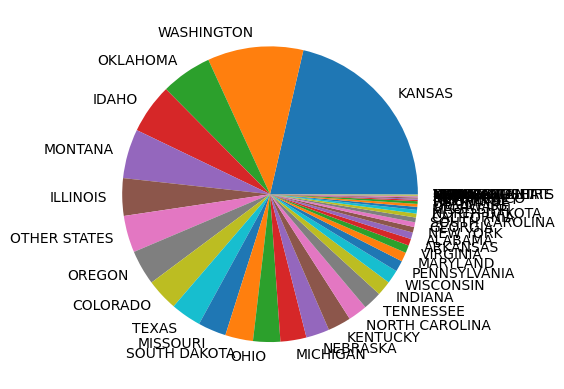

In [54]:
production_2022 = production_state[(production_state.year == 2022)].groupby(by ='state_name').agg({'Value': 'mean'}).sort_values('Value', ascending=False).dropna()
plt.pie(production_2022['Value'], labels=production_2022['Value'].index)

In [55]:
states_of_interest = production_2022[:11].index.tolist()
states_of_interest.remove('OTHER STATES')
states_of_interest

['KANSAS',
 'WASHINGTON',
 'OKLAHOMA',
 'IDAHO',
 'MONTANA',
 'ILLINOIS',
 'OREGON',
 'COLORADO',
 'TEXAS',
 'MISSOURI']

In [56]:
stocks_national_raw = dl.get_stocks_data('WHEAT', 2014, True)
stocks_national_raw['end_month'] = stocks_national_raw['end_month'].astype(int)
stocks_national = stocks_national_raw[['year', 'end_month', 'WHEAT - STOCKS, MEASURED IN BU', 'WHEAT, OFF FARM - STOCKS, MEASURED IN BU', 'WHEAT, ON FARM - STOCKS, MEASURED IN BU']]
# stocks_national.index.name = 'id'
stocks_national = stocks_national.rename(columns={
    'WHEAT - STOCKS, MEASURED IN BU': 'Total',
    'WHEAT, ON FARM - STOCKS, MEASURED IN BU': 'ON_FARM',
    'WHEAT, OFF FARM - STOCKS, MEASURED IN BU': 'OFF_FARM',
})
stocks_national

short_desc,year,end_month,Total,OFF_FARM,ON_FARM
0,2014,3,1056965000,819435000,237530000
1,2014,6,590283000,493288000,96995000
2,2014,9,1907220000,1193770000,713450000
3,2014,12,1529630000,1056830000,472800000
4,2015,3,1140407000,861697000,278710000
5,2015,6,752394000,597224000,155170000
6,2015,9,2097089000,1446889000,650200000
7,2015,12,1745907000,1242457000,503450000
8,2016,3,1371662000,1051862000,319800000
9,2016,6,975603000,778393000,197210000


In [57]:
condition_state_raw = dl.get_condition_data('WHEAT', 2018, national_level=False, raw=True)

condition_state_raw['year'] = pd.to_numeric(condition_state_raw['year'])
# condition_national_raw['Value'] = condition_national_raw['Value'].str.replace(',', '', regex=True)
condition_state_raw['Value'] = pd.to_numeric(condition_state_raw['Value'], errors='coerce')
raw_data = condition_state_raw[condition_state_raw.class_desc == 'WINTER']

condition_state = raw_data.pivot(index=['week_ending', 'year', 'state_name', 'end_code'], columns='unit_desc', values='Value').reset_index().set_index('week_ending')
condition_state.rename(columns={'end_code': 'week_number'}, inplace=True)

# Due to the API constrain, we get the data for 2014-2018 separately, and combine them together
for year in range(2014, 2018):
    condition_state_raw = dl.get_condition_data('WHEAT', 2014, exact_year=year, national_level=False, raw=True)

    condition_state_raw['year'] = pd.to_numeric(condition_state_raw['year'])
    # condition_national_raw['Value'] = condition_national_raw['Value'].str.replace(',', '', regex=True)
    condition_state_raw['Value'] = pd.to_numeric(condition_state_raw['Value'], errors='coerce')
    raw_data = condition_state_raw[condition_state_raw.class_desc == 'WINTER']

    condition_state_year = raw_data.pivot(index=['week_ending', 'year', 'state_name', 'end_code'], columns='unit_desc', values='Value').reset_index().set_index('week_ending')
    condition_state_year.rename(columns={'end_code': 'week_number'}, inplace=True)
    condition_state = pd.concat([condition_state_year, condition_state], axis=0)
condition_state.sort_index(inplace=True)
condition_state

unit_desc,year,state_name,week_number,PCT EXCELLENT,PCT FAIR,PCT GOOD,PCT POOR,PCT VERY POOR
week_ending,,,,,,,,
2013-10-20,2014,ARKANSAS,42,2.0,35.0,56.0,4.0,3.0
2013-10-20,2014,WASHINGTON,42,6.0,29.0,62.0,3.0,0.0
2013-10-20,2014,TEXAS,42,5.0,28.0,62.0,3.0,2.0
2013-10-20,2014,SOUTH DAKOTA,42,12.0,23.0,63.0,2.0,0.0
2013-10-20,2014,OREGON,42,4.0,11.0,81.0,4.0,0.0
...,...,...,...,...,...,...,...,...
2025-03-23,2025,COLORADO,12,9.0,25.0,57.0,6.0,3.0
2025-03-23,2025,KANSAS,12,6.0,34.0,43.0,13.0,4.0
2025-03-23,2025,LOUISIANA,12,1.0,35.0,64.0,0.0,0.0


# Put all data together to a dataframe

In [58]:
data = market_data.copy().reset_index()
for state in states_of_interest:
    # appending the yearly production data of each state
    yearly_production_data = production_state[
        (production_state.state_name==state) &
        (production_state.source_desc=='SURVEY')
    ].pivot(index='year', columns='reference_period_desc', values='Value').reset_index().set_index('year').add_prefix(state+'_')
    data = pd.merge(data, yearly_production_data, how='left', left_on='Year', right_on='year')

    weekly_condition_data = condition_state[
        condition_state.state_name==state
    ][['PCT EXCELLENT', 'PCT FAIR', 'PCT GOOD', 'PCT POOR', 'PCT VERY POOR']].add_prefix(state+'_')
    weekly_condition_data.index = pd.to_datetime(weekly_condition_data.index)

    # appending the weekly condition data
    data=pd.merge(data, weekly_condition_data, how='outer', left_on='Date', right_index=True)

# appending the quarterly stocks data
data = pd.merge(data, stocks_national, how='outer', left_on=['Year', 'Month'], right_on=['year', 'end_month'])

# drop redundant columns, sort by dates, and perform ffill
data = data.drop(['year', 'end_month', 'expiry'], axis=1)
data.sort_values(by='Date', inplace=True)
data = data.ffill(axis=0)

# This will remove the extra date created when merging the tables
data = data[data.Date.isin(market_data.index)]

# Creating the target column, which is the 7day log return
data['7d_log_return'] = np.log(data['Close']/data['Close'].shift(7))
data['Target'] = data['7d_log_return'].shift(-7)

data.dropna(inplace=True)
data.set_index('Date', inplace=True)
data

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,DTE,...,MISSOURI_PCT EXCELLENT,MISSOURI_PCT FAIR,MISSOURI_PCT GOOD,MISSOURI_PCT POOR,MISSOURI_PCT VERY POOR,Total,OFF_FARM,ON_FARM,7d_log_return,Target
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-03,610.00,640.00,608.25,626.75,1232.0,2014.0,3.0,3.0,62.0,11.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.016895,0.093241
2014-03-04,620.00,640.00,619.00,639.75,439.0,2014.0,3.0,4.0,63.0,10.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.048028,0.059544
2014-03-05,637.00,638.50,631.00,637.25,348.0,2014.0,3.0,5.0,64.0,9.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.031078,0.079892
2014-03-06,632.50,643.50,631.00,641.50,128.0,2014.0,3.0,6.0,65.0,8.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.042187,0.050162
2014-03-07,642.00,655.00,642.00,646.25,139.0,2014.0,3.0,7.0,66.0,7.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.074257,0.069122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12,534.00,538.75,534.00,538.75,3.0,2025.0,3.0,12.0,71.0,2.0,...,5.0,27.0,64.0,4.0,0.0,1.569626e+09,1.103046e+09,466580000.0,0.012608,0.035555
2025-03-13,549.00,551.25,547.25,547.25,15.0,2025.0,3.0,13.0,72.0,1.0,...,5.0,27.0,64.0,4.0,0.0,1.569626e+09,1.103046e+09,466580000.0,0.053966,0.001826
2025-03-14,545.75,545.75,545.75,545.75,60916.0,2025.0,3.0,14.0,73.0,0.0,...,5.0,27.0,64.0,4.0,0.0,1.569626e+09,1.103046e+09,466580000.0,0.027870,-0.004591


In [17]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Month', 'Day',
       'Day_Of_Year', 'DTE',
       ...
       'MISSOURI_PCT EXCELLENT', 'MISSOURI_PCT FAIR', 'MISSOURI_PCT GOOD',
       'MISSOURI_PCT POOR', 'MISSOURI_PCT VERY POOR', 'Total', 'OFF_FARM',
       'ON_FARM', '7d_log_return', 'Target'],
      dtype='object', length=129)

# Building a LSTM model using the above data

In [59]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


In [60]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        # the following code assumes that the target is the last column
        targets.append(data[i+seq_length][-1])
    return np.array(sequences), np.array(targets)

# TODO, this was the old code, and it may cause data leakage
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data)

SEQ_LENGTH = 60
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Convert to PyTorch tensors
X_train, y_train = torch.tensor(X[:-500], dtype=torch.float32).to(device), torch.tensor(y[:-500], dtype=torch.float32).to(device)
X_test, y_test = torch.tensor(X[-500:], dtype=torch.float32).to(device), torch.tensor(y[-500:], dtype=torch.float32).to(device)

# Reshape for LSTM (batch_size, seq_length, num_features)
X_train = X_train.view(-1, SEQ_LENGTH, 129)
X_test = X_test.view(-1, SEQ_LENGTH, 129)

# Create DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False)

In [61]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim=129, hidden_dim=64, num_layers=2, output_dim=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # Take last output from LSTM
        return out

# Initialize Model
model = LSTMModel().to(device)


In [62]:
# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
EPOCHS = 1000
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_x)
        loss = criterion(y_pred.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss/len(train_loader):.6f}')

Epoch [10/1000], Loss: 0.005552
Epoch [20/1000], Loss: 0.003461
Epoch [30/1000], Loss: 0.002969
Epoch [40/1000], Loss: 0.002736
Epoch [50/1000], Loss: 0.002303
Epoch [60/1000], Loss: 0.001747
Epoch [70/1000], Loss: 0.001446
Epoch [80/1000], Loss: 0.001269
Epoch [90/1000], Loss: 0.001093
Epoch [100/1000], Loss: 0.000937
Epoch [110/1000], Loss: 0.000806
Epoch [120/1000], Loss: 0.000662
Epoch [130/1000], Loss: 0.000602
Epoch [140/1000], Loss: 0.000435
Epoch [150/1000], Loss: 0.000396
Epoch [160/1000], Loss: 0.000259
Epoch [170/1000], Loss: 0.000231
Epoch [180/1000], Loss: 0.000296
Epoch [190/1000], Loss: 0.000226
Epoch [200/1000], Loss: 0.000243
Epoch [210/1000], Loss: 0.000195
Epoch [220/1000], Loss: 0.000197
Epoch [230/1000], Loss: 0.000076
Epoch [240/1000], Loss: 0.000314
Epoch [250/1000], Loss: 0.000134
Epoch [260/1000], Loss: 0.000109
Epoch [270/1000], Loss: 0.000301
Epoch [280/1000], Loss: 0.000070
Epoch [290/1000], Loss: 0.000163
Epoch [300/1000], Loss: 0.000093
Epoch [310/1000], L

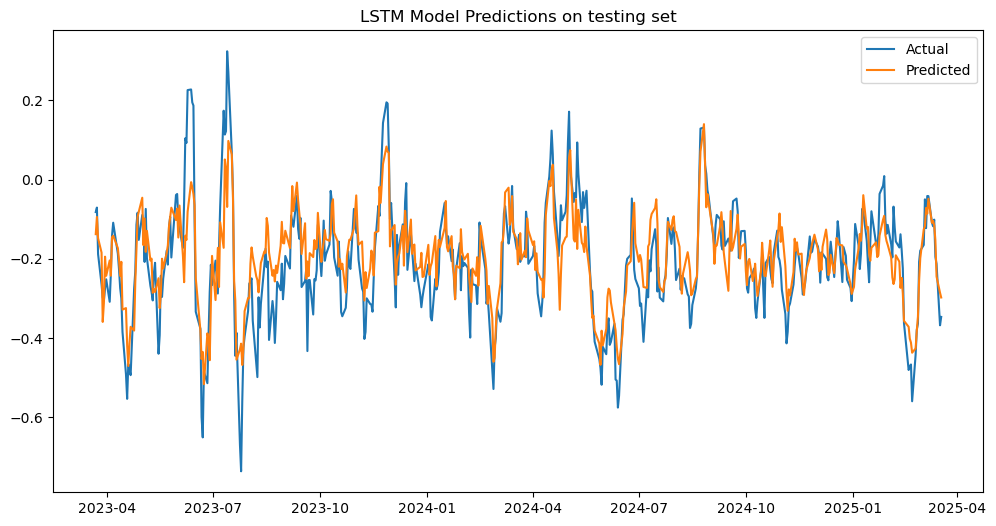

r2 score 0.6448


In [63]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).squeeze().cpu().numpy()

# Inverse transform predictions
# y_pred_test_rescaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
# y_test_rescaled = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

y_pred_test_rescaled = y_pred_test.reshape(-1, 1)
y_test_rescaled = y_test.cpu().numpy().reshape(-1, 1)

# Plot results

plt.figure(figsize=(12, 6))
plt.plot(data.index[-500:], y_test_rescaled, label='Actual')
plt.plot(data.index[-500:], y_pred_test_rescaled, label='Predicted')
plt.legend()
plt.title("LSTM Model Predictions on testing set")
plt.show()

print(f"r2 score {r2_score(y_test_rescaled, y_pred_test_rescaled):.4f}")

### The above is the result where the scaler is applied to all the data. including both features and target.

### Try the more standard and correct scalling

In [77]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        # the following code assumes that the target is the last column
        targets.append(data[i+seq_length][-1])
    return np.array(sequences), np.array(targets)

data_train = data[:-500]
data_test = data[-500:]

# Now, this scaler will not cause data leakage
scaler = MinMaxScaler(feature_range=(-1, 1))
data_train= scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)
data_scaled = np.vstack([data_train, data_test])

SEQ_LENGTH = 60
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Convert to PyTorch tensors
X_train, y_train = torch.tensor(X[:-500], dtype=torch.float32).to(device), torch.tensor(y[:-500], dtype=torch.float32).to(device)
X_test, y_test = torch.tensor(X[-500:], dtype=torch.float32).to(device), torch.tensor(y[-500:], dtype=torch.float32).to(device)

# Reshape for LSTM (batch_size, seq_length, num_features)
X_train = X_train.view(-1, SEQ_LENGTH, 129)
X_test = X_test.view(-1, SEQ_LENGTH, 129)

# Create DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False)


In [78]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim=129, hidden_dim=64, num_layers=2, output_dim=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # Take last output from LSTM
        return out

# Initialize Model
model = LSTMModel().to(device)

In [79]:
# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
EPOCHS = 1000
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_x)
        loss = criterion(y_pred.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss/len(train_loader):.6f}')

Epoch [10/1000], Loss: 0.005233
Epoch [20/1000], Loss: 0.003754
Epoch [30/1000], Loss: 0.003059
Epoch [40/1000], Loss: 0.002749
Epoch [50/1000], Loss: 0.002074
Epoch [60/1000], Loss: 0.001698
Epoch [70/1000], Loss: 0.001423
Epoch [80/1000], Loss: 0.001298
Epoch [90/1000], Loss: 0.001038
Epoch [100/1000], Loss: 0.000916
Epoch [110/1000], Loss: 0.000752
Epoch [120/1000], Loss: 0.000744
Epoch [130/1000], Loss: 0.000579
Epoch [140/1000], Loss: 0.000455
Epoch [150/1000], Loss: 0.000375
Epoch [160/1000], Loss: 0.000396
Epoch [170/1000], Loss: 0.000308
Epoch [180/1000], Loss: 0.000329
Epoch [190/1000], Loss: 0.000302
Epoch [200/1000], Loss: 0.000201
Epoch [210/1000], Loss: 0.000321
Epoch [220/1000], Loss: 0.000233
Epoch [230/1000], Loss: 0.000158
Epoch [240/1000], Loss: 0.000276
Epoch [250/1000], Loss: 0.000096
Epoch [260/1000], Loss: 0.000214
Epoch [270/1000], Loss: 0.000157
Epoch [280/1000], Loss: 0.000173
Epoch [290/1000], Loss: 0.000096
Epoch [300/1000], Loss: 0.000120
Epoch [310/1000], L

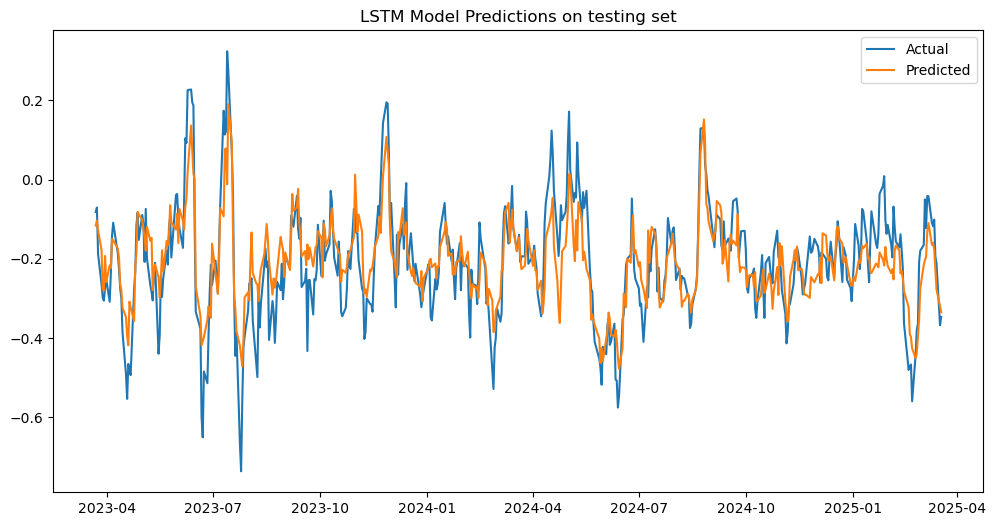

r2 score 0.6624


In [80]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).squeeze().cpu().numpy()

# Inverse transform predictions
# y_pred_test_rescaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
# y_test_rescaled = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

y_pred_test_rescaled = y_pred_test.reshape(-1, 1)
y_test_rescaled = y_test.cpu().numpy().reshape(-1, 1)

# Plot results

plt.figure(figsize=(12, 6))
plt.plot(data.index[-500:], y_test_rescaled, label='Actual')
plt.plot(data.index[-500:], y_pred_test_rescaled, label='Predicted')
plt.legend()
plt.title("LSTM Model Predictions on testing set")
plt.show()

print(f"r2 score {r2_score(y_test_rescaled, y_pred_test_rescaled):.4f}")

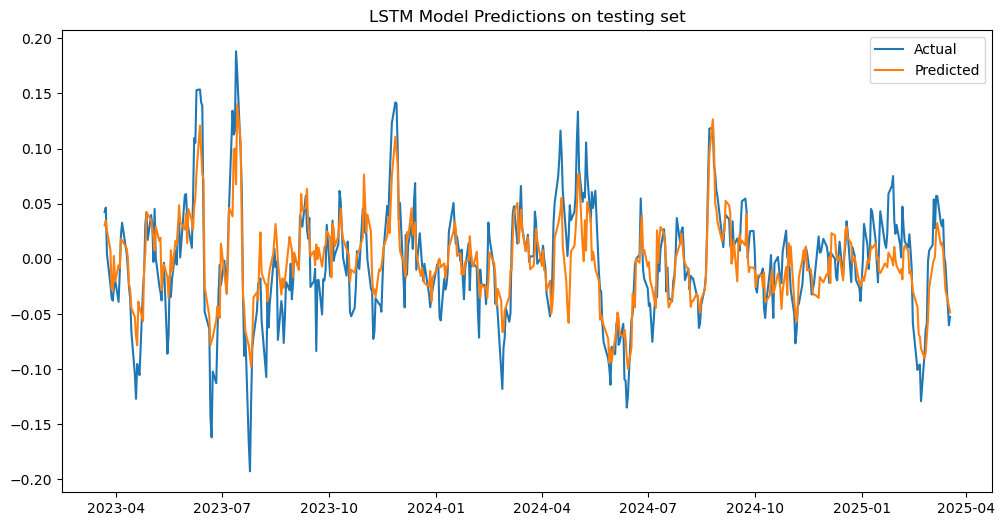

r2 score 0.6624


In [91]:
# Transforming the data back to the usual scale
res1 = scaler.inverse_transform(np.hstack([data_test[:, :-1], y_pred_test.reshape(-1, 1)]))
res2 = scaler.inverse_transform(data_test)
y_pred = res1[:, -1].reshape(-1, 1)
y_test = res2[:, -1].reshape(-1, 1)

plt.figure(figsize=(12, 6))
plt.plot(data.index[-500:], y_test, label='Actual')
plt.plot(data.index[-500:], y_pred, label='Predicted')
plt.legend()
plt.title("LSTM Model Predictions on testing set")
plt.show()

print(f"r2 score {r2_score(y_test, y_pred):.4f}")